In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv',header=None)

In [22]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Identify using boxplot

<AxesSubplot:xlabel='5'>

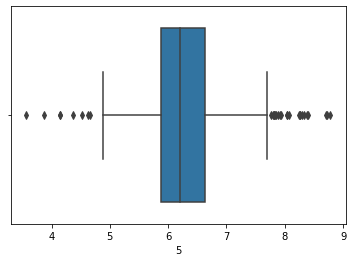

In [40]:
sns.boxplot(data=df,x=5)

### Identify using histplot

<AxesSubplot:xlabel='5', ylabel='Count'>

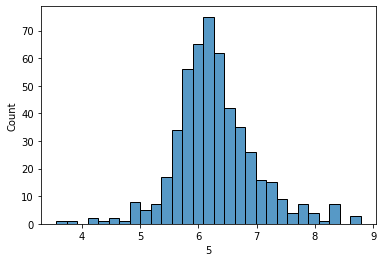

In [41]:
sns.histplot(df.loc[:,5])

### Identify using scatterplot

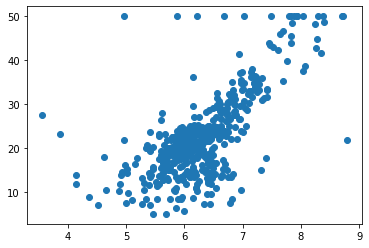

In [51]:
plt.scatter(df.loc[:,5],df.loc[:,13])

### Identify using Z-score

In [89]:
upper = df.loc[:,5].mean() + 2.5*df.loc[:,5].std()  ## threshold is 3 standard deviation
lower = df.loc[:,5].mean() -2.5*df.loc[:,5].std()
top_outliers=df.loc[df.loc[:,5]<lower,5]
bottom_outliers=df.loc[df.loc[:,5]>upper,5]

In [90]:
pd.concat((top_outliers,bottom_outliers)).index

Int64Index([365, 367, 374, 384, 406, 414,  97, 163, 224, 225, 232, 233, 253,
            257, 262, 267, 364],
           dtype='int64')

C:\Users\Shahdab\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='5'>

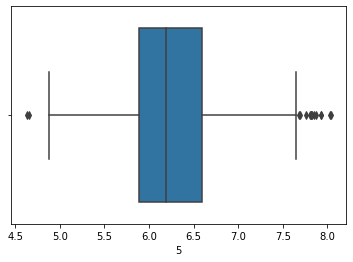

In [91]:
sns.boxplot(df.drop(pd.concat((top_outliers,bottom_outliers)).index,axis=0).loc[:,5])

### Identify using IQR (inter quartile range)

In [65]:
#  IQR = 25% - 75%

In [66]:
Q1 = df.loc[:,5].quantile(0.25)
Q3 = df.loc[:,5].quantile(0.75)
IQR = Q3 - Q1

In [67]:
top_outliers=df.loc[df.loc[:,5]<(Q1 - 1.5 * IQR),5]  # df['4'] < (Q1 - 1.5 * IQR)
bottom_outliers=df.loc[df.loc[:,5]> (Q3 + 1.5 * IQR),5]

In [83]:
pd.concat((top_outliers,bottom_outliers))

365    3.561
367    3.863
374    4.138
384    4.368
386    4.652
406    4.138
412    4.628
414    4.519
97     8.069
98     7.820
162    7.802
163    8.375
166    7.929
180    7.765
186    7.831
195    7.875
203    7.853
204    8.034
224    8.266
225    8.725
226    8.040
232    8.337
233    8.247
253    8.259
257    8.704
262    8.398
267    8.297
280    7.820
283    7.923
364    8.780
Name: 5, dtype: float64

C:\Users\Shahdab\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='5'>

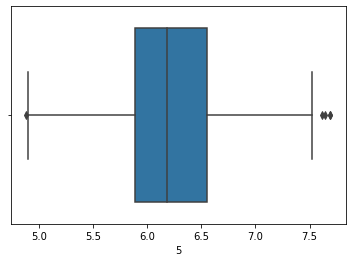

In [82]:
sns.boxplot(df.drop(pd.concat((top_outliers,bottom_outliers)).index,axis=0).loc[:,5])

### Identifying outliers using dbscan

In [92]:
from sklearn.cluster import DBSCAN
from collections import Counter

In [130]:
for j in np.linspace(0.1,1,20):
    model = DBSCAN(eps=round(j,2), min_samples=3).fit(df.values)
    print(Counter(model.labels_))

Counter({-1: 506})
Counter({-1: 506})
Counter({-1: 506})
Counter({-1: 506})
Counter({-1: 506})
Counter({-1: 506})
Counter({-1: 506})
Counter({-1: 506})
Counter({-1: 506})
Counter({-1: 506})
Counter({-1: 506})
Counter({-1: 506})
Counter({-1: 506})
Counter({-1: 506})
Counter({-1: 506})
Counter({-1: 506})
Counter({-1: 506})
Counter({-1: 506})
Counter({-1: 506})
Counter({-1: 506})


In [166]:
outlier_detection = DBSCAN(
 eps = 0.3, 
 metric='euclidean', 
 min_samples = 20,
 n_jobs = -1)

In [167]:
clusters = outlier_detection.fit_predict(df.values)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [181]:
data=pd.read_csv('Mall_Customers.csv.xls')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [182]:
data=data.drop('CustomerID',axis=1)
data=data.rename(columns={
 'Annual Income (k$)':'Income',
 'Spending Score (1–100)':'Spend_Score'})
df=pd.get_dummies(data)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
num2 = scaler.fit_transform(df)
num2 = pd.DataFrame(num2, columns = df.columns)

In [198]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(
 eps = .6, 
 metric='euclidean', 
 min_samples = 16,
 n_jobs = -1)
clusters = outlier_detection.fit_predict(num2)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Income'>

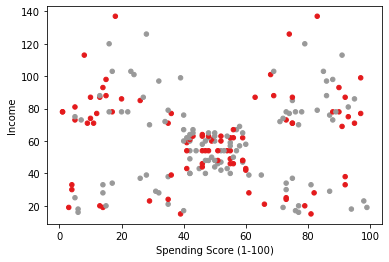

In [199]:
from matplotlib import cm
cmap = cm.get_cmap('Set1')
df.plot.scatter(x='Spending Score (1-100)',y='Income', c=clusters, cmap=cmap,
 colorbar = False)

In [ ]:
df['Income']